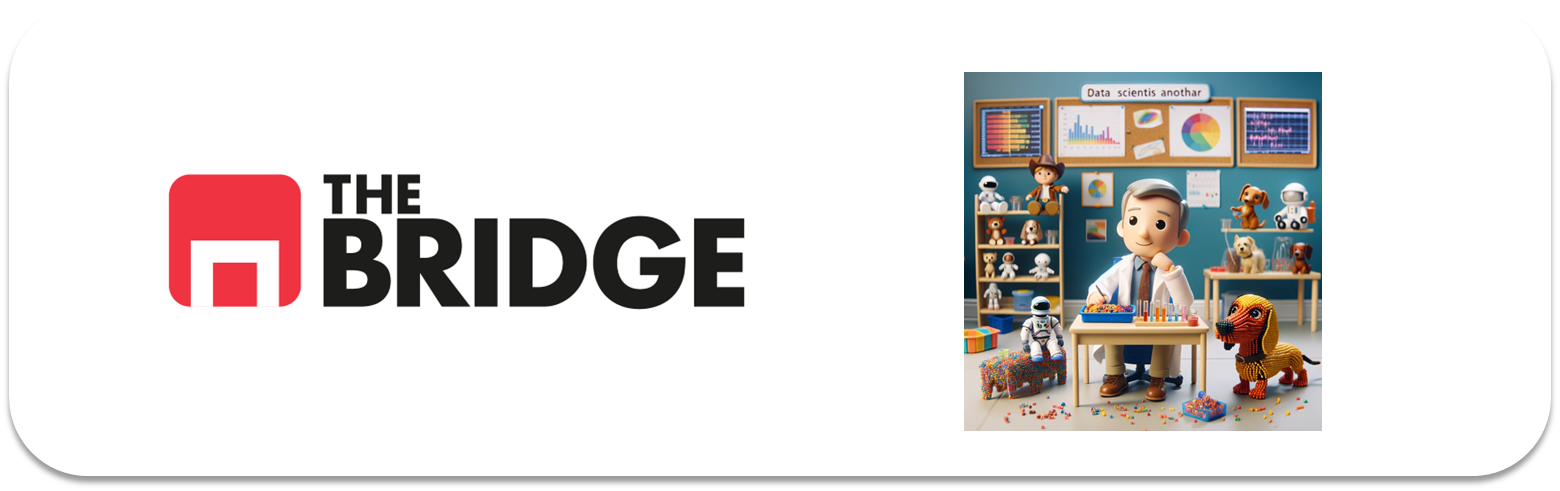

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df_titanic = sns.load_dataset("titanic")

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [5]:
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [6]:
df_titanic.info() # Hay 891 registros pero tenemos nulos en "age", "embarked", "deck", "embark_town"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df_titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [ ]:
df_titanic.isnull().mean()*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [9]:
df_titanic_2 = df_titanic.drop("parch", axis=1) #eliminamos "parch"
df_titanic_2.head(10)

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
# En "embarked" y "embarked_town" tienen un bajo indice de valores nulos 0.22% por lo que decido eliminar esas filas con valores nulos, 
# tambien seria posible asumir que embarcaron en la coiudad de Southampton
df_titanic_3 = df_titanic_2.dropna(subset=["embarked"])
df_titanic_3.info()

# df_titanic_2.loc[df_titanic_2.embark_town.isna()], "embark_town"] = df_titanic_2.embark_town()[0]

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   fare         889 non-null    float64 
 6   embarked     889 non-null    object  
 7   class        889 non-null    category
 8   who          889 non-null    object  
 9   adult_male   889 non-null    bool    
 10  deck         201 non-null    category
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(3), object(5)
memory usage: 80.3+ KB


In [11]:
# En "deck" los valores nulos son 77% muy significativo, elimino la columna
df_titanic_4 = df_titanic_3.drop("deck", axis=1)



In [ ]:
# age los valores nulos son un 17% que es significativo, decido sustituirlo por la media de edades
df_titanic_4["age"] = df_titanic_4["age"].fillna(df_titanic_4["age"].mean())
df_titanic_4.info()



<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   fare         889 non-null    float64 
 6   embarked     889 non-null    object  
 7   class        889 non-null    category
 8   who          889 non-null    object  
 9   adult_male   889 non-null    bool    
 10  embark_town  889 non-null    object  
 11  alive        889 non-null    object  
 12  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(5)
memory usage: 79.1+ KB


In [41]:
df_titanic.age.mean()

np.float64(29.69911764705882)

In [ ]:
# podriamos segmentar por who que tendria mas sentido ;)
df_titanic.loc[df_titanic.who == "man", "age"].mean()

np.float64(33.17312348668281)

In [42]:
# Imputo el valor por who en age:
es_woman = df_titanic.who == "woman"
es_child = df_titanic.who == "child"
es_man = df_titanic.who == "man"
media_woman = df_titanic.loc[es_woman,"age"].mean()
media_child = df_titanic.loc[es_child,"age"].mean()
media_man = df_titanic.loc[es_man,"age"].mean()
es_age_nulo = df_titanic.age.isna()
df_titanic.loc[es_woman & es_age_nulo, "age"] = media_woman
df_titanic.loc[es_child & es_age_nulo, "age"] = media_child
df_titanic.loc[es_man & es_age_nulo, "age"] = media_man

### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
|survived|Superviciente, 1= True, 0=False |
|pclass|Categoria viaje(1/2/3)| 
|sex|Sexo del viajero (male/female) incluye a los niños|
|age|Edad, aqui el 17% que no teniamos datos los hemos rellenado con la media, y luego hemos valorado aplicar media segun who|
|sibsp|Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)|
|fare|Importe pagado del viaje|
|embarked|Es la incial de la letra de la ciudad donde embarcó la persona.|
|class|Categoria viaje(First-Second-Thrid) coincide con pclass en numero|
|who|man/woman/child
|adult_male| Adulto(True/False)|
|embark_town|Ciudad de embarque|
|alive|Superviviente (Yes/no) coincide con survived
|alone|True/False, pero no tengo claro su valor, puede ser que se salvara el solo del grupo familiares??| 


| Columna/Variable | Descripción |
| ---------------- | ----------- |
| survived         | Indica si el pasajero sobrevivió (1) o no (0) |
| pclass           | Clase del pasaje (1ª, 2ª, 3ª) |
| sex              | Género del pasajero |
| age              | Edad del pasajero |
| sibsp            | Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros) |
| parch            | Número de padres/hijos a bordo |
| fare             | Tarifa pagada por el pasajero |
| embarked         | Es la incial de la letra de la ciudad donde embarcó la persona.(C = Cherbourg; Q = Queenstown; S = Southampton) |
| class            | Clase del pasaje como categoría (Primera, Segunda, Tercera) |
| who              | Categoría del pasajero (hombre, mujer, niño) |
| adult_male       | Booleano que indica si el pasajero es un hombre adulto |
| deck             | Cubierta del barco donde se ubicaba el pasajero |
| embark_town      | Ciudad de embarque: Cherbourg; Queenstown; Southampton)  |
| alive            | Indica si el pasajero está vivo ('yes') o muerto ('no') |
| alone            | Booleano que indica si el pasajero viajaba solo |

### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [13]:
#Southampton (S)
#Cherburgo  (C)
#Queenstown (Q)
df_titanic_4["embarked"]= df_titanic_4["embarked"].replace(["S", "C", "Q"], ["Southampton", "Cherburgo", "Queenstown"])
df_titanic_4.head(5)

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,Southampton,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,71.2833,Cherburgo,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,Southampton,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,Southampton,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,Southampton,Third,man,True,Southampton,no,True


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [14]:
#calculamos la cardinalidad para conocer mejor las variables a tratar
df_tipificacion = pd.DataFrame([df_titanic_4.nunique(), df_titanic_4.nunique()/len(df_titanic_4)*100, df_titanic_4.dtypes]).T.rename(columns= {0:"Card", 1:"%Card", 2:"Tipo"})
df_tipificacion

,Card,%Card,Tipo
survived,2,0.224972,int64
pclass,3,0.337458,int64
sex,2,0.224972,object
age,89,10.011249,float64
sibsp,7,0.787402,int64
fare,247,27.784027,float64
embarked,3,0.337458,object
class,3,0.337458,category
who,3,0.337458,object
adult_male,2,0.224972,bool


In [15]:
df_titanic_4.describe()

,survived,pclass,age,sibsp,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,32.096681
std,0.486260,0.834700,12.968346,1.103705,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,7.895800
50%,0.000000,3.000000,29.642093,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200


| Columna/Variable | Descripción |Tipo de Variable|Importancia Inicial|Notas|
| ---------------- | ----------- |-|-|-|
|survived|Superviciente, 1= True, 0=False |Binaria|0|Indicador clave si sobrevivio o no| 
|age|Edad, aqui el 17% que no teniamos datos los hemos rellenado con la media|Numerica|1|Puede ser determinante la edad|
|fare|Importe pagado del viaje|Numerica|1|Un mayor importe del billete mas opciones de sobrevivir|
|embarked|Ciudad donde embarcó la persona.|Categorica|2|No creo sea relevante|
|class|Categoria viaje(First-Second-Thrid) coincide con pclass en numero|Categorica|1|La categoria del viaje influye?|
|who|man/woman/child|Categorica|1| es una variable a considerar|
|alone|True/False, pero no tengo claro su valor, puede ser que se salvara el solo del grupo familiares??|Categorica|2|variable a analizar| 

In [50]:
# Primero dividir las variables por tipo, usando la función que programamos en los ejercicios
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)
    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento
    return df_temp

In [51]:
card_tipo(df_titanic_4)

,Card,%_Card,Tipo,tipo_sugerido
survived,2,0.224972,int64,Binaria
pclass,3,0.337458,int64,Categorica
sex,2,0.224972,object,Binaria
age,89,10.011249,float64,Numerica discreta
sibsp,7,0.787402,int64,Categorica
fare,247,27.784027,float64,Numerica discreta
embarked,3,0.337458,object,Categorica
class,3,0.337458,category,Categorica
who,3,0.337458,object,Categorica
adult_male,2,0.224972,bool,Binaria


### #2.1 Categóricas

In [54]:
variables_categoricas = ["who","class","embarked","alone","alive", "sex"]
#Analizamos las frecuencias absolutas y relativas de las variables de estudio
for i in variables_categoricas:
    print(f"Para {i}")
    print(df_titanic_4[i].value_counts())
    print("\n"*2)

Para who
who
man      537
woman    269
child     83
Name: count, dtype: int64



Para class
class
Third     491
First     214
Second    184
Name: count, dtype: int64



Para embarked
embarked
Southampton    644
Cherburgo      168
Queenstown      77
Name: count, dtype: int64



Para alone
alone
True     535
False    354
Name: count, dtype: int64



Para alive
alive
no     549
yes    340
Name: count, dtype: int64



Para sex
sex
male      577
female    312
Name: count, dtype: int64





In [17]:
for i in variables_categoricas:
    print(f"Para {i}")
    print(df_titanic_4[i].value_counts()/len(df_titanic_4)*100)
    print("\n"*2)

Para who
who
man      60.404949
woman    30.258718
child     9.336333
Name: count, dtype: float64



Para class
class
Third     55.230596
First     24.071991
Second    20.697413
Name: count, dtype: float64



Para embarked
embarked
Southampton    72.440945
Cherburgo      18.897638
Queenstown      8.661417
Name: count, dtype: float64



Para alone
alone
True     60.179978
False    39.820022
Name: count, dtype: float64



Para survived
survived
0    61.754781
1    38.245219
Name: count, dtype: float64





In [55]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False, giro = 45):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=giro)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


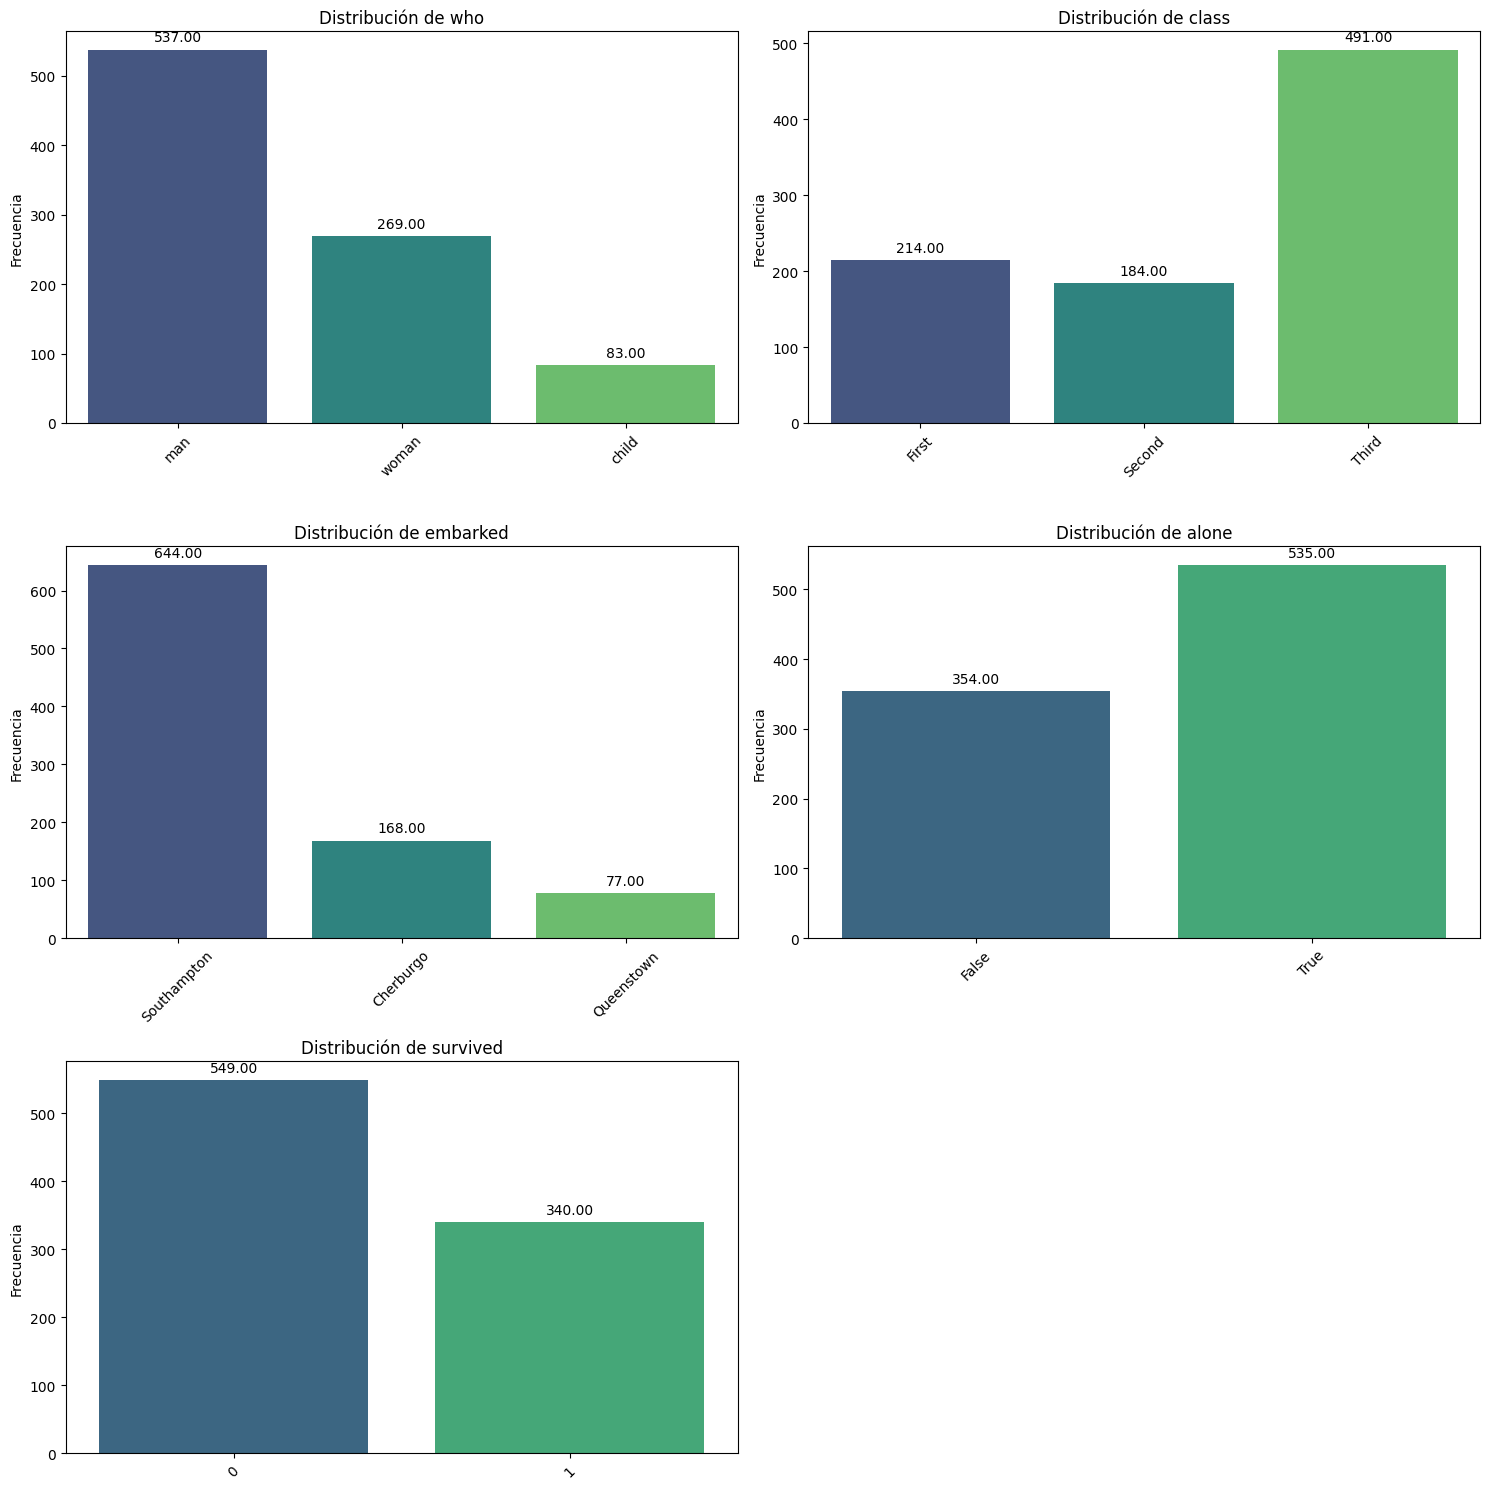

In [52]:
pinta_distribucion_categoricas(df_titanic_4, variables_categoricas, mostrar_valores=True)

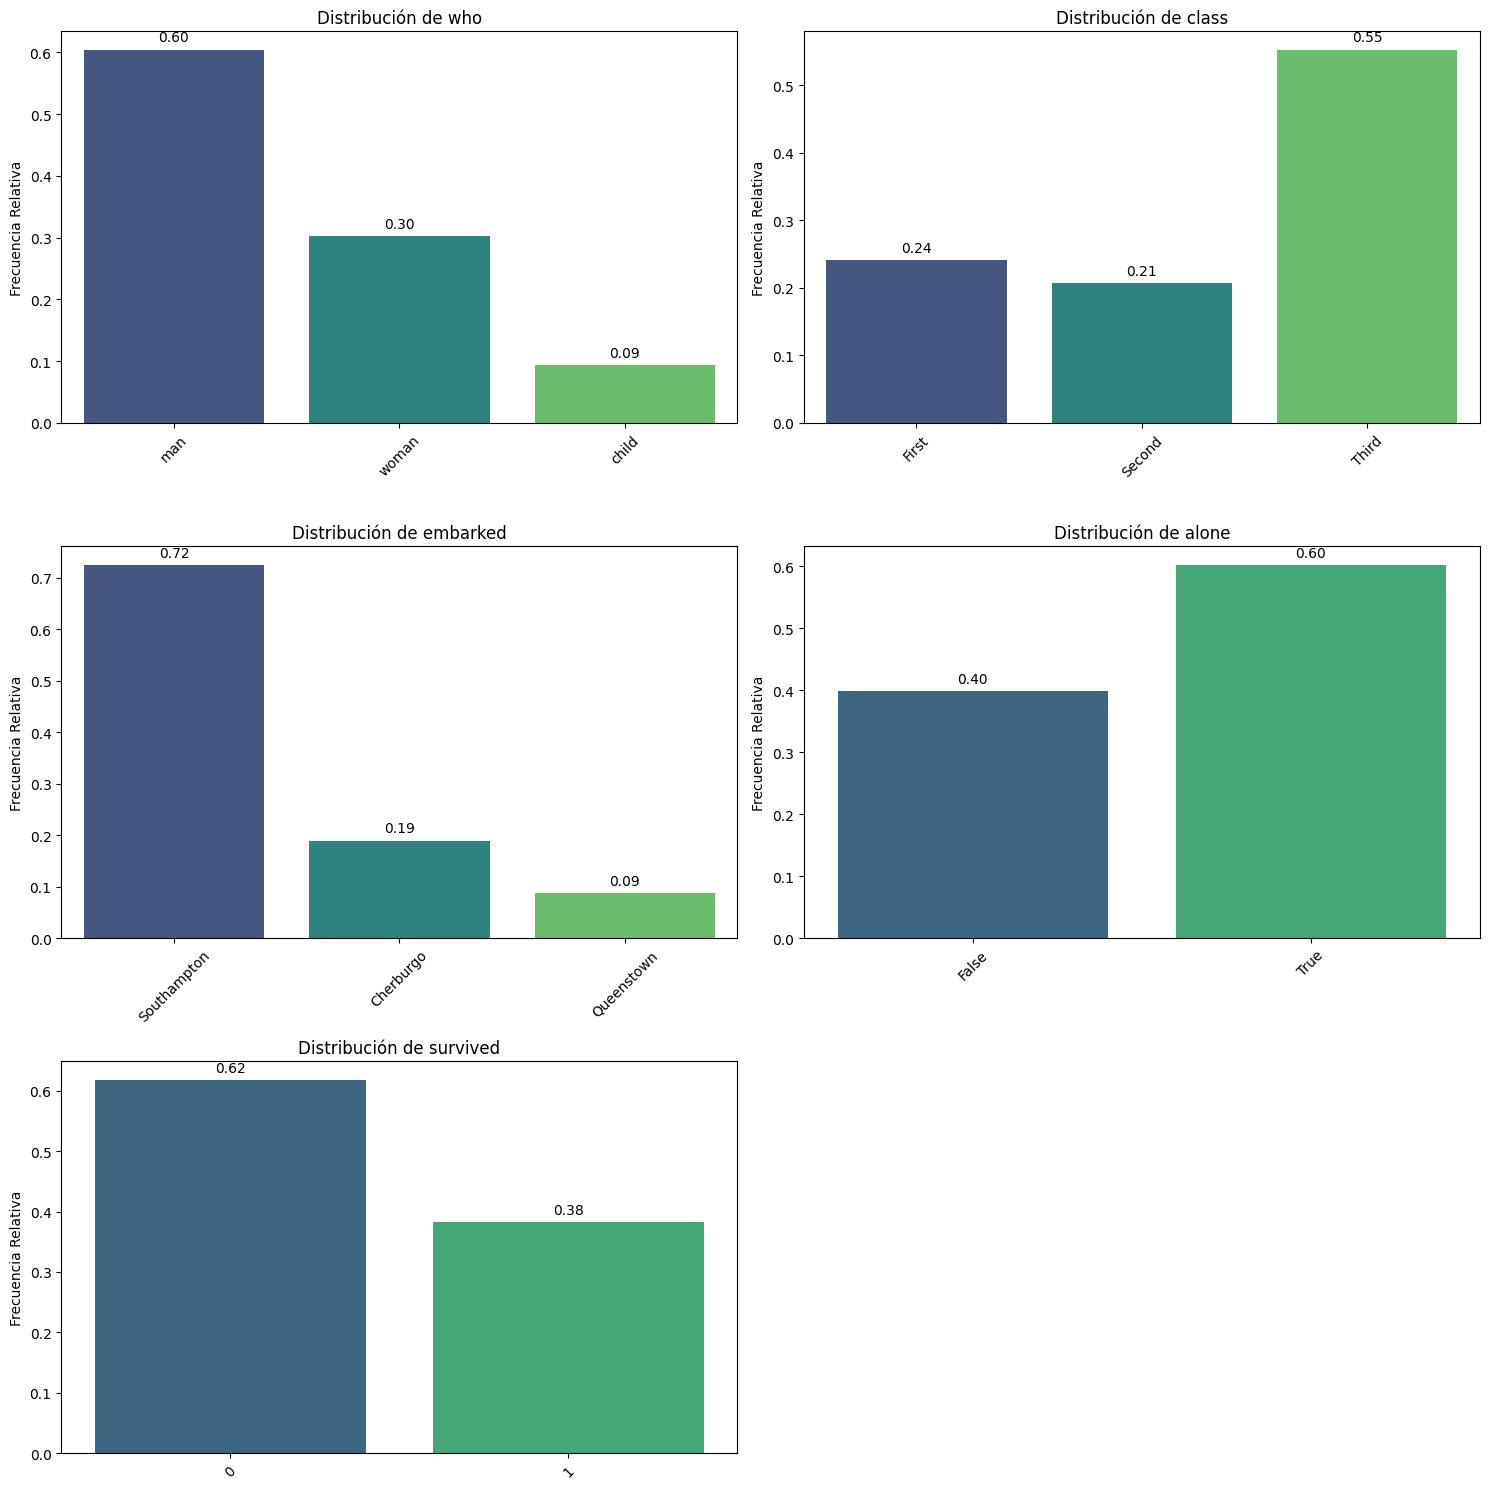

In [53]:
pinta_distribucion_categoricas(df_titanic_4, variables_categoricas, relativa=True, mostrar_valores=True)

<Axes: >

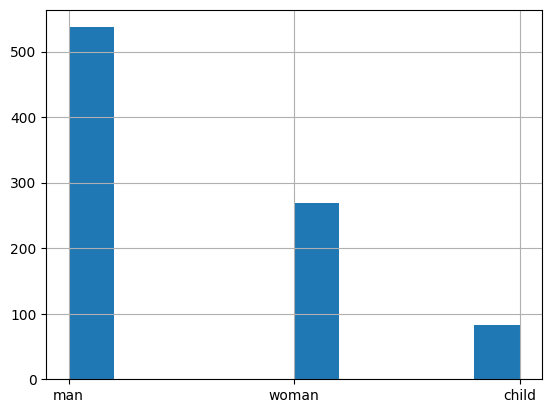

In [21]:
variables_categoricas = ["who","class","embarked","alone","survived"]

#Analizamos junto con el grafico de barras las conclusiones por variable categorica:

df_titanic_4.who.hist() # Conclusión: La mayoría de pasajeros eran hombres 60% 537, frente a 30% 269 mujeres y 10% 83 niños

<Axes: >

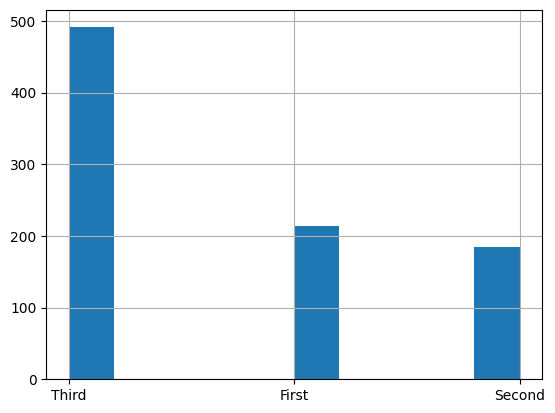

In [22]:
df_titanic_4["class"].hist() # Conclusión: La mayoría de pasajeros viajaban en 3ª clase 55% 491 , 1ª 24% 214 y 2ª 21% 184 

<Axes: >

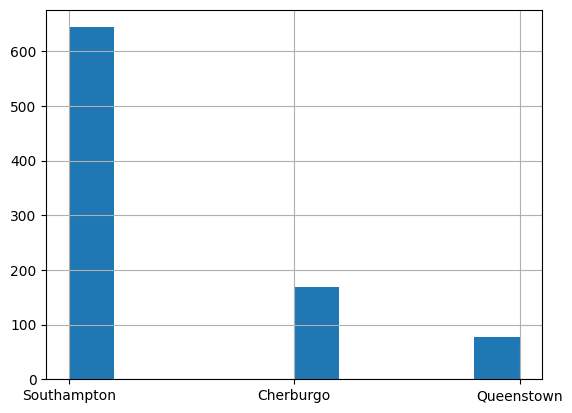

In [23]:
df_titanic_4.embarked.hist() # Conclusión: La mayoria de viajeros embarcaron en el primer origen Southampton 72% 644, 18% 168 en Cherburgo y 8% 77 en Queenstown

<Axes: >

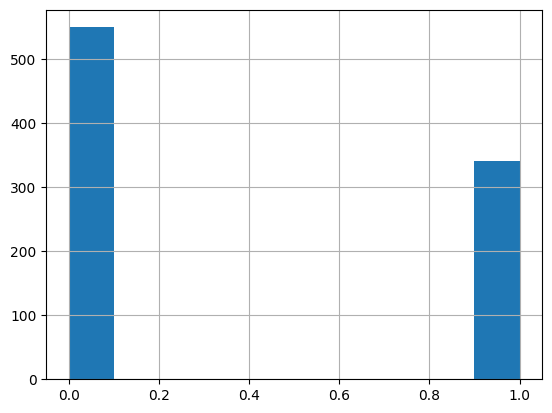

In [24]:
df_titanic_4.survived.hist() # Conclusión: Sobrevivieron 62% 340 viajeros y fallecieron 38% 549

<Axes: >

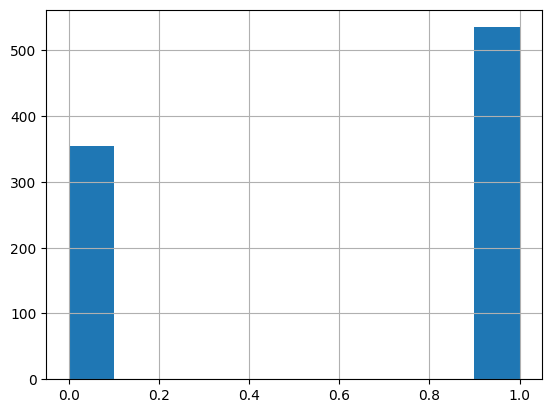

In [25]:
df_titanic_4["alone"].astype(int).hist() # Como es booleano hemos tenido que convertirlo a int para hacer el grafico. 
#Conclusión: 60% 535 pasajeros viajaban solos frente a 40% 354 que viajaban con acompañantes

### #2.2 Numéricas

In [26]:
variables_numericas = ["age","fare"]

#Analizamos las frecuencias absolutas y relativas de las variables de estudio
for i in variables_numericas:
    print(f"Para {i}")
    print(df_titanic_4[i].value_counts())
    print("\n"*2)



Para age
age
29.642093    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
24.500000      1
0.670000       1
0.420000       1
34.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64



Para fare
fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 247, dtype: int64





In [27]:
#Analizamos las frecuencias absolutas y relativas de las variables de estudio:
for i in variables_numericas:
    print(f"Para {i}")
    print(df_titanic_4[i].value_counts()/len(df_titanic_4)*100)
    print("\n"*2)

Para age
age
29.642093    19.910011
24.000000     3.374578
22.000000     3.037120
18.000000     2.924634
28.000000     2.812148
               ...    
24.500000     0.112486
0.670000      0.112486
0.420000      0.112486
34.500000     0.112486
74.000000     0.112486
Name: count, Length: 89, dtype: float64



Para fare
fare
8.0500     4.836895
13.0000    4.724409
7.8958     4.274466
7.7500     3.824522
26.0000    3.487064
             ...   
13.8583    0.112486
50.4958    0.112486
5.0000     0.112486
9.8458     0.112486
10.5167    0.112486
Name: count, Length: 247, dtype: float64





In [28]:
#Pintamos los graficos de barras de las variables absoluto y relativo:

In [29]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False, giro = 45):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=giro)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


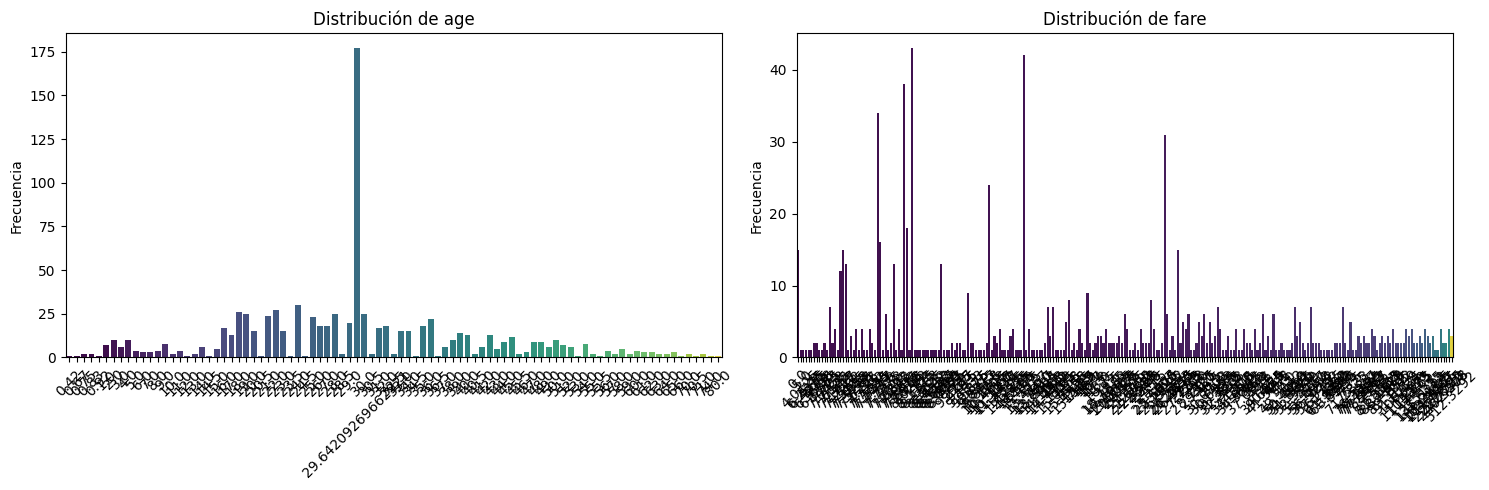

In [30]:
pinta_distribucion_categoricas(df_titanic_4, variables_numericas)

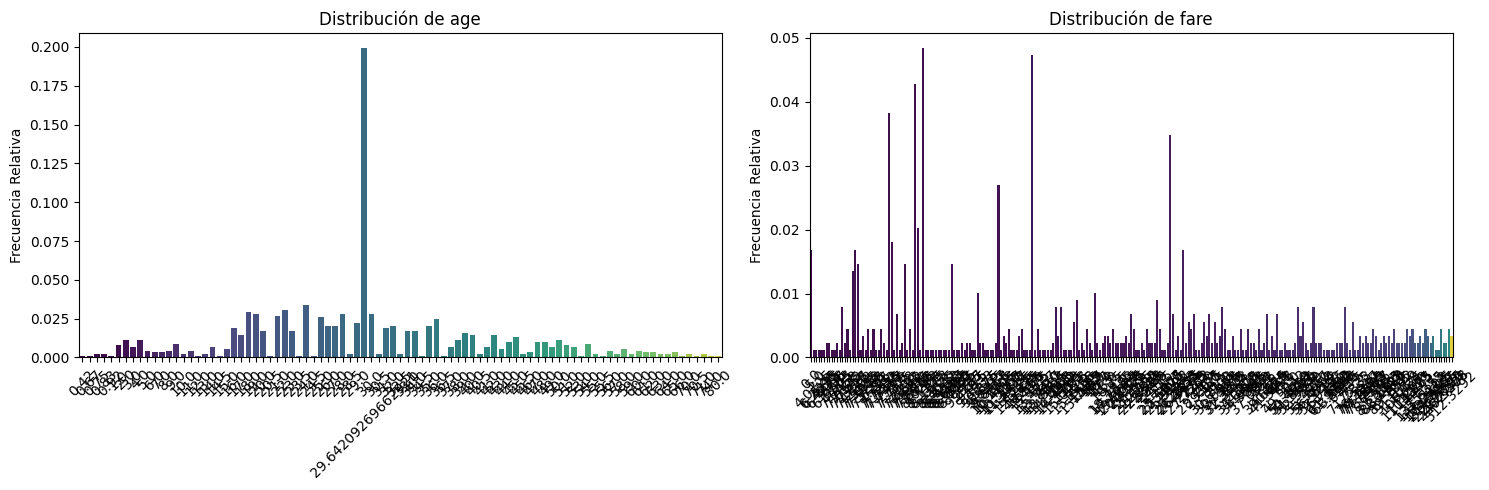

In [31]:
pinta_distribucion_categoricas(df_titanic_4, variables_numericas, relativa=True)

In [32]:
def variabilidad(df):
    df_var = df.describe().T
    df_var["CV"] = df_var["std"]/df_var["mean"]
    return df_var

variabilidad(df_titanic_4[variables_numericas]) # tenemos altas variabilidades en ambas variables como indica un COEFICIENTE DE VARIACION que supera 30%


,count,mean,std,min,25%,50%,75%,max,CV
age,889.0,29.642093,12.968346,0.42,22.0000,29.642093,35.0,80.0000,0.437498
fare,889.0,32.096681,49.697504,0.00,7.8958,14.454200,31.0,512.3292,1.548369


In [33]:
#Analizamos los graficos de cajas

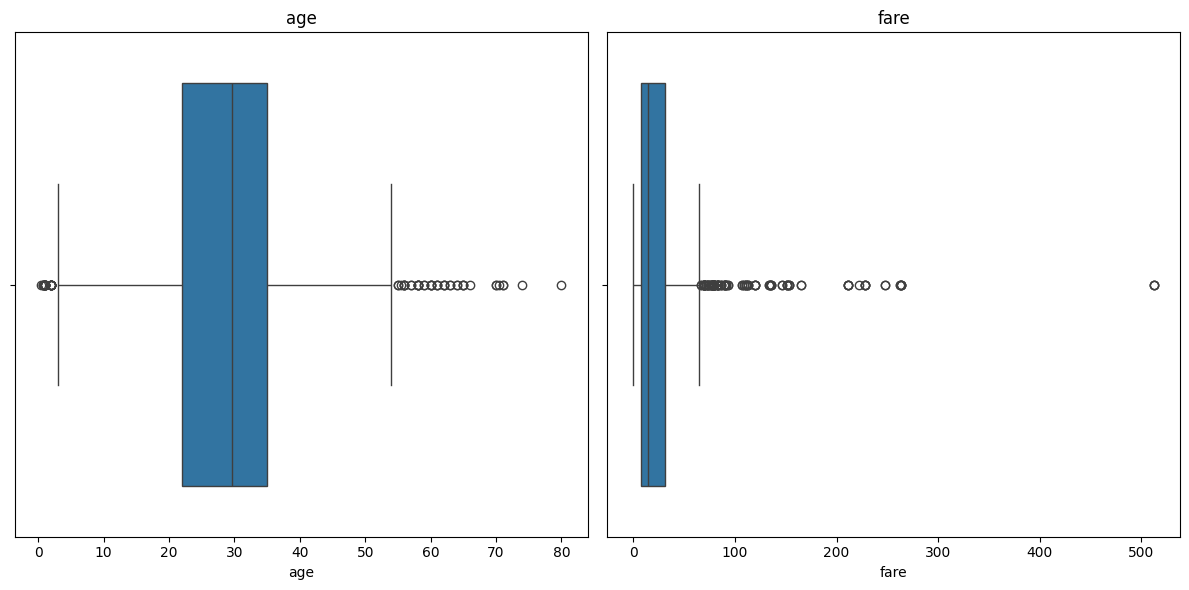

In [ ]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_multiple_boxplots(df_titanic_4, variables_numericas)

In [35]:
# Vemos que como hay outliers si aplicamos el 4.5 para eliminar "bigotes" en edad funciona pero en fare no.

In [36]:
def plot_combined_graphs(df, columns, whisker_width=1.5, bins = None):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0], bins= "auto" if not bins else bins)
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

(2, 2)


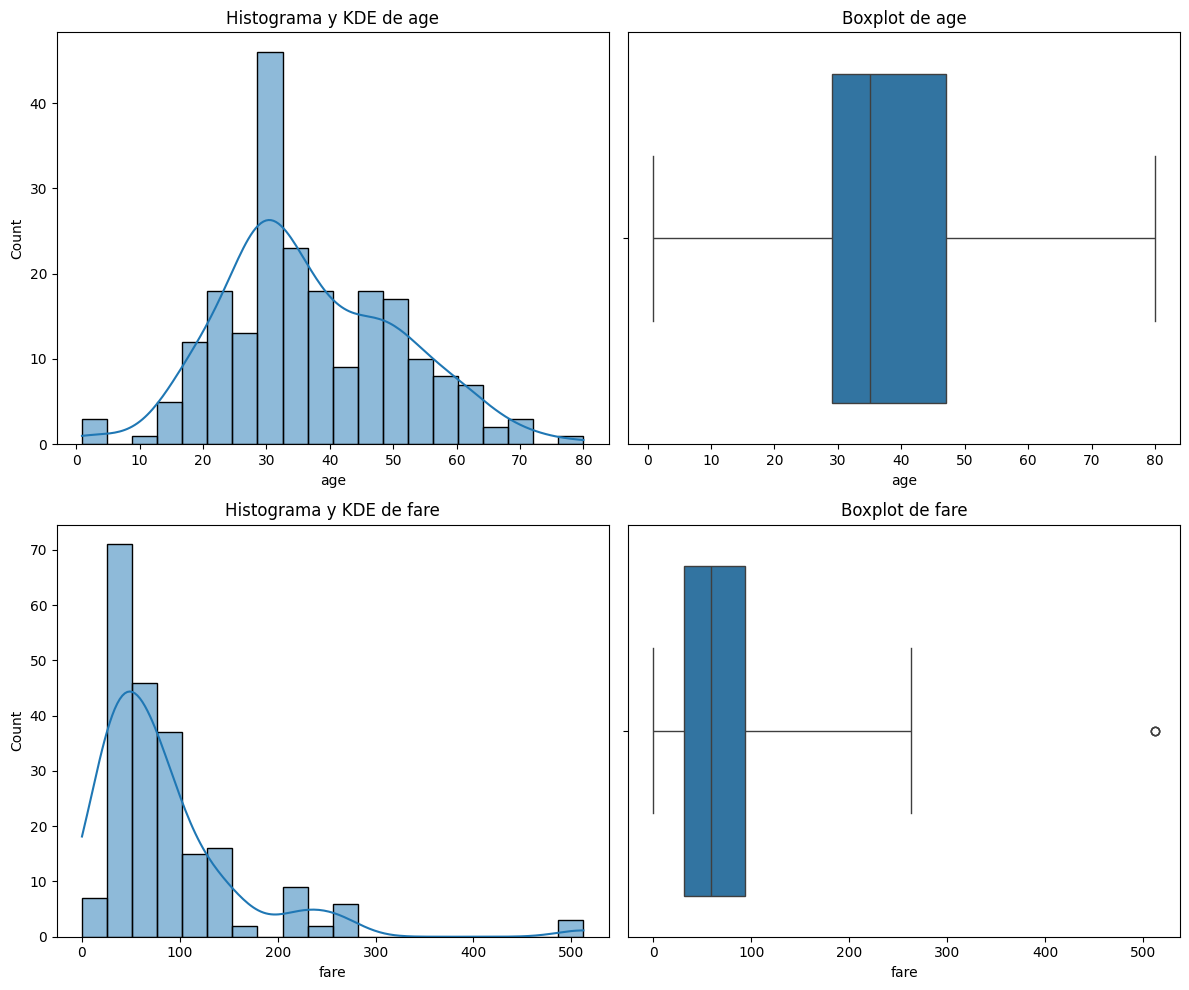

In [61]:
plot_combined_graphs(df_titanic_4[df_titanic_4.pclass == 1], variables_numericas, whisker_width= 4.5, bins=20)

In [ ]:
# Conclusiones "age": la edad entre 22 y 34 se encuentra la edad del 50% de los viajeros pero hay grandes dispersiones, 
#   llegando a max 80 años. (ojo aqui un 17% de los valores eran inicialmente nulos y los rellene con la media)
# Conclusion "Fare": el coste de billete entre 5.89 y 31 (libras?¿) esta el 50% de los viajeros, 
# pero aqui la dispersion es mayor sobretodo llegado a un max de 512 libras

In [58]:
# Obtenemos sus CVs:
def get_CV(df, columna):
    columna = [columna] if type(columna) == str else columna
    return df[columna].describe().T["std"]/df[columna].describe().T["mean"] * 100

In [59]:
get_CV(df_titanic_4, "fare")

fare    154.836896
dtype: float64